# Billionaires Analysis 2022 and 2021

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "saurav6234488/analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/saurav6234488/analysis


'https://jovian.ai/saurav6234488/analysis'

## Collecting Raw Data from WWW.Kaggle.com:


Importing all the Modules which we will use in this project.<br>
numpy:- For making array or numerical computation faster.<br>
pandas:- Handling dataframes and reading and writing data.<br>
matplotlib.pyplot and seaborn:- For the visualization of data.<br> 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Data Preparation and Cleaning-2021.




In [5]:
raw_data_2021=pd.read_csv('Billionaire_2021.csv')

In [6]:
raw_data_2021

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified


Now, I have downloaded the Billionaire data for the year 2021. I first clean the raw data for 2021 and after that I'll proceed for the year 2022.

In [7]:
raw_data_2021.columns

Index(['Name', 'NetWorth', 'Country', 'Source', 'Rank', 'Age', 'Industry'], dtype='object')

In [8]:
raw_data_2021.describe()

,Rank,Age
count,2755.000000,2676.000000
mean,1345.663521,63.113602
std,772.669811,13.445153
min,1.000000,18.000000
25%,680.000000,54.000000
50%,1362.000000,63.000000
75%,2035.000000,73.000000
max,2674.000000,99.000000


Now, I'll convert NetWoth column which is having datatype object into float and also rename the column into NetWorth_Billion_Dollars.
After that I need to arrange the Columns into proper way to visualize the data properly.
Rank, Name, NetWorth_Billion_Dollars, Age, Country, Source,  Industry.

In [9]:
raw_data_2021['NetWorth_Billion_Dollars'] = raw_data_2021['NetWorth'].replace({'\$': '', 'B': ''}, regex=True).astype(float)

regex = True helps in substacting each string from the series of string passed and perform the instructions given.<br>
Above is a function used to remove character in values and extract numeric data and convert them in float.
Now I have float in the NetWorth_Billion_Dollars column.

In [10]:
raw_data_2021.sample(5)

,Name,NetWorth,Country,Source,Rank,Age,Industry,NetWorth_Billion_Dollars
954,Zhang Xin & Pan Shiyi,$3.3 B,China,real estate,925,55.0,Real Estate,3.3
2371,Yu Jinkun & family,$1.3 B,China,transportation equipment,2263,78.0,Manufacturing,1.3
1171,Xu Zhihan,$2.8 B,China,electronics,1111,48.0,Technology,2.8
934,Samvel Karapetyan,$3.3 B,Russia,real estate,925,55.0,Construction & Engineering,3.3
2307,Anna Kasprzak,$1.3 B,Denmark,shoes,2263,31.0,Fashion & Retail,1.3


In [11]:
raw_data_2021.describe()

,Rank,Age,NetWorth_Billion_Dollars
count,2755.000000,2676.000000,2755.000000
mean,1345.663521,63.113602,4.749220
std,772.669811,13.445153,9.615358
min,1.000000,18.000000,1.000000
25%,680.000000,54.000000,1.500000
50%,1362.000000,63.000000,2.300000
75%,2035.000000,73.000000,4.200000
max,2674.000000,99.000000,177.000000


I saw that the maximum rank is 2674 and Rank count is 2755 i.e. there must be some repeated rank. So now I'll find the repeated rank and solve this issue.

In [12]:
raw_data_2021.Rank.value_counts()

2524    150
2378    146
2141    122
2263    115
2035    106
       ... 
93        1
94        1
95        1
98        1
154       1
Name: Rank, Length: 245, dtype: int64

In [13]:
raw_data_2021[raw_data_2021.Rank==2035]

,Name,NetWorth,Country,Source,Rank,Age,Industry,NetWorth_Billion_Dollars
2034,Antti Aarnio-Wihuri,$1.5 B,Finland,diversified,2035,81.0,Diversified,1.5
2035,Hamdi Akin & family,$1.5 B,Turkey,diversified,2035,66.0,Diversified,1.5
2036,"Herbert Allen, Jr. & family",$1.5 B,United States,investment banking,2035,81.0,Finance & Investments,1.5
2037,Harindarpal Banga,$1.5 B,India,commodities,2035,70.0,Finance & Investments,1.5
2038,Ulrike Baro,$1.5 B,Germany,biopharmaceuticals,2035,NaN,Healthcare,1.5
...,...,...,...,...,...,...,...,...
2135,Zeng Chaolin,$1.5 B,China,Aluminium,2035,38.0,Metals & Mining,1.5
2136,Zhong Sheng Jian,$1.5 B,Singapore,real estate,2035,63.0,Real Estate,1.5
2137,Zhou Jian,$1.5 B,China,robotics,2035,44.0,Technology,1.5
2138,Zhu Yiming,$1.5 B,China,semiconductors,2035,48.0,Technology,1.5


So I have entries where people have same net worth which means they share common rank.<br>
Either I can make absolute unique rank for each person by adding one in index or leave same rank. Making new rank is not good here so I'm leaving as it is.

## Adding New Column 'Year' in Data.

In [14]:
raw_data_2021['Year']=np.full(2755,2021)

In [15]:
selected_columns=['Rank','Name','NetWorth_Billion_Dollars','Country','Age','Industry','Source','Year']

In [16]:
clean_data_2021=raw_data_2021[selected_columns].copy()

In [17]:
clean_data_2021

,Rank,Name,NetWorth_Billion_Dollars,Country,Age,Industry,Source,Year
0,1,Jeff Bezos,177.0,United States,57.0,Technology,Amazon,2021
1,2,Elon Musk,151.0,United States,49.0,Automotive,"Tesla, SpaceX",2021
2,3,Bernard Arnault & family,150.0,France,72.0,Fashion & Retail,LVMH,2021
3,4,Bill Gates,124.0,United States,65.0,Technology,Microsoft,2021
4,5,Mark Zuckerberg,97.0,United States,36.0,Technology,Facebook,2021
...,...,...,...,...,...,...,...,...
2750,2674,Daniel Yong Zhang,1.0,China,49.0,Technology,e-commerce,2021
2751,2674,Zhang Yuqiang,1.0,China,65.0,Manufacturing,Fiberglass,2021
2752,2674,Zhao Meiguang,1.0,China,58.0,Metals & Mining,gold mining,2021
2753,2674,Zhong Naixiong,1.0,China,58.0,Diversified,conglomerate,2021


## Data Preparation and Cleaning-2022

In [18]:
raw_data_2022=pd.read_csv('forbes_2022_billionaires.csv')

In [19]:
raw_data_2022.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In the above data, I have 22 columns and 2668 rows, so now I'll make both the data (2021 and 2022) with equal number of columns and also make the name same in both the dataframes.

In [20]:
raw_data_2022.columns

Index(['rank', 'personName', 'age', 'finalWorth', 'year', 'month', 'category',
       'source', 'country', 'state', 'city', 'countryOfCitizenship',
       'organization', 'selfMade', 'gender', 'birthDate', 'title',
       'philanthropyScore', 'residenceMsa', 'numberOfSiblings', 'bio',
       'about'],
      dtype='object')

In [21]:
raw_data_2022.rename(columns={'rank':'Rank','personName':'Name','finalWorth':'NetWorth_Billion_Dollars','age':'Age','country':'Country','source':'Source','category':'Industry'},inplace=True)

I renamed all the columns which is common in both the dataframes.

In [22]:
raw_data_2022.head()

,Rank,Name,Age,NetWorth_Billion_Dollars,year,month,Industry,Source,Country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


#### Selecting column of interest from the raw_data_2022.

In [23]:
selected_columns_2022=['Rank','Name','NetWorth_Billion_Dollars','Country','Age','Industry','Source']

In [24]:
raw_data_2022_df=raw_data_2022[selected_columns_2022]

In [25]:
raw_data_2022_df

,Rank,Name,NetWorth_Billion_Dollars,Country,Age,Industry,Source
0,1,Elon Musk,219000.0,United States,50.0,Automotive,"Tesla, SpaceX"
1,2,Jeff Bezos,171000.0,United States,58.0,Technology,Amazon
2,3,Bernard Arnault & family,158000.0,France,73.0,Fashion & Retail,LVMH
3,4,Bill Gates,129000.0,United States,66.0,Technology,Microsoft
4,5,Warren Buffett,118000.0,United States,91.0,Finance & Investments,Berkshire Hathaway
...,...,...,...,...,...,...,...
2663,2578,Zhang Yuqiang,1000.0,China,66.0,Manufacturing,Fiberglass
2664,2578,Zhou Ruxin,1000.0,China,59.0,Technology,Navigation
2665,2578,Wen Zhou & family,1000.0,China,57.0,Manufacturing,chemicals
2666,2578,Zhou Yifeng & family,1000.0,China,43.0,Energy,liquefied petroleum gas


raw_data_2022_df[:20]

As the NetWorth is in Million Dollars so I need to divide the whole column with 1000 to convert it in Billion Dollars.  

In [26]:
raw_data_2022_df['NetWorth_Billion_Dollars']=raw_data_2022_df['NetWorth_Billion_Dollars']/1000

/tmp/ipykernel_69/1690951230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_2022_df['NetWorth_Billion_Dollars']=raw_data_2022_df['NetWorth_Billion_Dollars']/1000


In [27]:
raw_data_2022_df.NetWorth_Billion_Dollars.head()

0    219.0
1    171.0
2    158.0
3    129.0
4    118.0
Name: NetWorth_Billion_Dollars, dtype: float64

In [28]:
raw_data_2022_df.describe()

,Rank,NetWorth_Billion_Dollars,Age
count,2668.000000,2668.000000,2582.000000
mean,1302.919040,4.762350,64.210689
std,747.807782,10.540482,13.401258
min,1.000000,1.000000,19.000000
25%,665.000000,1.500000,55.000000
50%,1292.000000,2.400000,64.000000
75%,1929.000000,4.300000,74.000000
max,2578.000000,219.000000,100.000000


Here is also number of Billionaires are more than the rank and I'm guessing that same reason is also here.

In [29]:
raw_data_2022_df['Year']=np.full(2668,2022)

/tmp/ipykernel_69/3420947563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_2022_df['Year']=np.full(2668,2022)


In [30]:
raw_data_2022_df.sample(5)

,Rank,Name,NetWorth_Billion_Dollars,Country,Age,Industry,Source,Year
2302,2190,Wang Jianyi,1.3,China,59.0,Technology,fiber optic cables,2022
2644,2578,Mike Speiser,1.0,United States,51.0,Technology,software,2022
385,386,Chen Jianhua,6.5,China,51.0,Manufacturing,chemicals,2022
1348,1341,Cho Young-sik,2.3,South Korea,60.0,Healthcare,diagnostics,2022
1576,1513,Michael Ying,2.0,Hong Kong,72.0,Fashion & Retail,retail,2022


In [31]:
clean_data_2022=raw_data_2022_df.copy()

In [32]:
clean_data_2022

,Rank,Name,NetWorth_Billion_Dollars,Country,Age,Industry,Source,Year
0,1,Elon Musk,219.0,United States,50.0,Automotive,"Tesla, SpaceX",2022
1,2,Jeff Bezos,171.0,United States,58.0,Technology,Amazon,2022
2,3,Bernard Arnault & family,158.0,France,73.0,Fashion & Retail,LVMH,2022
3,4,Bill Gates,129.0,United States,66.0,Technology,Microsoft,2022
4,5,Warren Buffett,118.0,United States,91.0,Finance & Investments,Berkshire Hathaway,2022
...,...,...,...,...,...,...,...,...
2663,2578,Zhang Yuqiang,1.0,China,66.0,Manufacturing,Fiberglass,2022
2664,2578,Zhou Ruxin,1.0,China,59.0,Technology,Navigation,2022
2665,2578,Wen Zhou & family,1.0,China,57.0,Manufacturing,chemicals,2022
2666,2578,Zhou Yifeng & family,1.0,China,43.0,Energy,liquefied petroleum gas,2022


## What is the effect on the total count and mean of networth of the Billionaires in 2021 and 2022?

Till now, we can see that in the year 2021 there were 2755 person in the world having networth more than 1 Billion Dollars whereas in the year 2022 it's decreased to 2688. The mean of net worth in the year 2021 was 4.749220 Billion Dollars but in the year 2022 it's slightly increases and reached 4.762350 Billion Dollars.

Saving the data Jovian platform.

In [33]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "saurav6234488/analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/saurav6234488/analysis


'https://jovian.ai/saurav6234488/analysis'

## Data Visualization

In [34]:
import matplotlib

In [35]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)

I have imported matplotlib and seaborn to plot the data into 2-D.<br>
%matplotlib inline is used to view the graph into same frame.<br>
rcParams is used to change the font size, figure size etc permanently.


## How wealth is distributed among all the Billionaires in both the years?

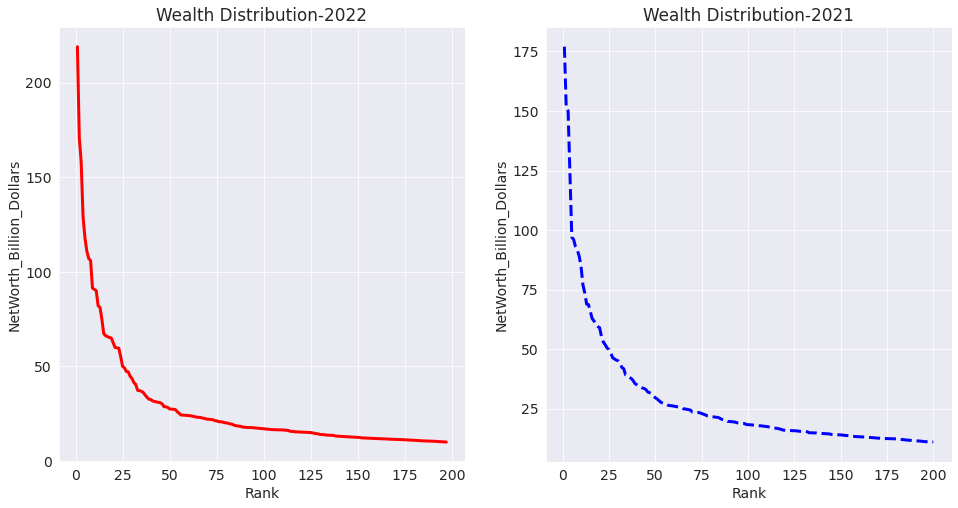

In [36]:
fig, axes= plt.subplots(1,2,figsize=(16,8))
axes[0].plot(clean_data_2022.Rank[:200],clean_data_2022.NetWorth_Billion_Dollars[:200],'-r',lw=3)
axes[1].plot(clean_data_2021.Rank[:200],clean_data_2021.NetWorth_Billion_Dollars[:200],'--b',lw=3)
axes[0].set_xlabel('Rank')
axes[1].set_xlabel('Rank')
axes[0].set_ylabel('NetWorth_Billion_Dollars')
axes[1].set_ylabel('NetWorth_Billion_Dollars')
axes[0].set_title('Wealth Distribution-2022')
axes[1].set_title('Wealth Distribution-2021');

After plotting the graph between Networth and Rank, We can see that in both the year the slope of the graph from 1 to 100 is very high after that it's tending to zero.

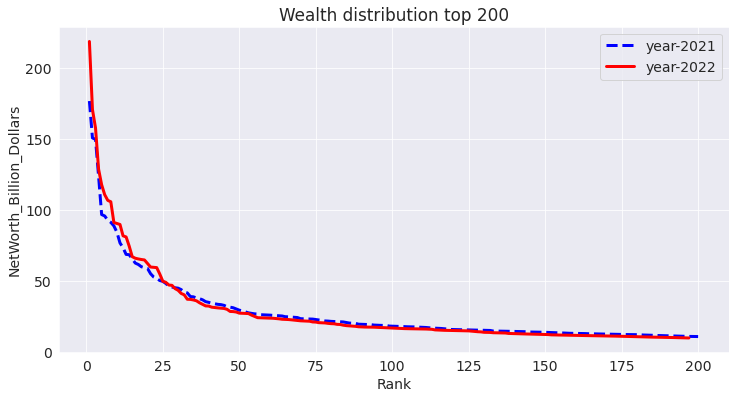

In [37]:
import matplotlib
matplotlib.rcParams['font.size'] = 14
plt.figure(figsize=(12, 6))
plt.plot(clean_data_2021.Rank[:200],clean_data_2021.NetWorth_Billion_Dollars[:200],'--b',lw=3)
plt.plot(clean_data_2022.Rank[:200],clean_data_2022.NetWorth_Billion_Dollars[:200],'-r',lw=3)
plt.legend(['year-2021','year-2022'])
plt.title("Wealth distribution top 200")
plt.ylabel('NetWorth_Billion_Dollars')
plt.xlabel('Rank');

In both the year the graph is following the same pattern as discussed above.

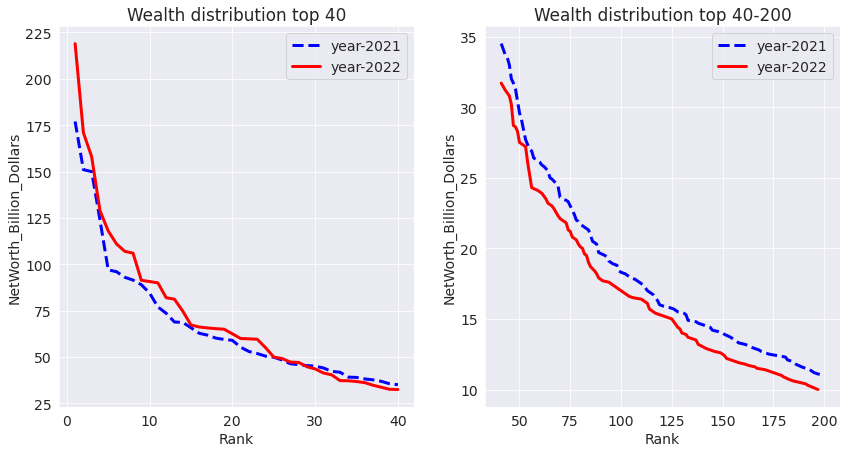

In [38]:
fig,axes=plt.subplots(1,2,figsize=(14,7))

axes[0].plot(clean_data_2021.Rank[:40],clean_data_2021.NetWorth_Billion_Dollars[:40],'--b',lw=3)
axes[0].plot(clean_data_2022.Rank[:40],clean_data_2022.NetWorth_Billion_Dollars[:40],'-r',lw=3)
axes[0].legend(['year-2021','year-2022'])
axes[0].set_title("Wealth distribution top 40")
axes[0].set_ylabel('NetWorth_Billion_Dollars')
axes[0].set_xlabel('Rank');
axes[1].plot(clean_data_2021.Rank[40:200],clean_data_2021.NetWorth_Billion_Dollars[40:200],'--b',lw=3)
axes[1].plot(clean_data_2022.Rank[40:200],clean_data_2022.NetWorth_Billion_Dollars[40:200],'-r',lw=3)
axes[1].legend(['year-2021','year-2022'])
axes[1].set_title("Wealth distribution top 40-200")
axes[1].set_ylabel('NetWorth_Billion_Dollars')
axes[1].set_xlabel('Rank');

We can see that there is increase in the wealth of top 40 Billionaires from their previous year wealth where after rank 40 the growth is negative.

In [39]:
jovian.commit()


<IPython.core.display.Javascript object>

[jovian] Updating notebook "saurav6234488/analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/saurav6234488/analysis


'https://jovian.ai/saurav6234488/analysis'

## What is the frequency of Billionaires in a particular net worth range?

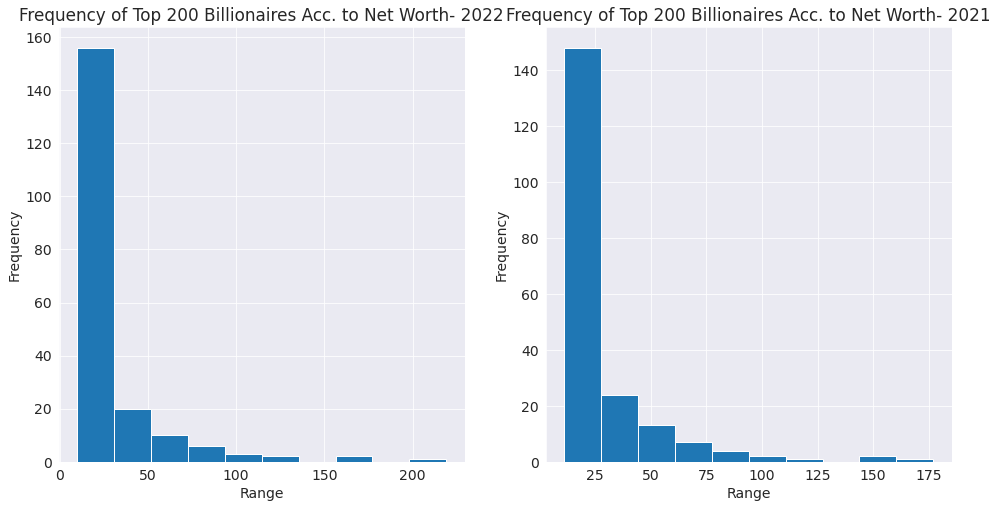

In [40]:
fig, axes= plt.subplots(1,2,figsize=(16,8))
axes[0].hist(clean_data_2022.NetWorth_Billion_Dollars[clean_data_2022.Rank<=200],bins=10)
axes[0].set_title('Frequency of Top 200 Billionaires Acc. to Net Worth- 2022')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Range')
axes[1].hist(clean_data_2021.NetWorth_Billion_Dollars[clean_data_2021.Rank<=200],bins=10);
axes[1].set_title('Frequency of Top 200 Billionaires Acc. to Net Worth- 2021')
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Range');

As expected Count of Billionaires are highly concentrated at lower range of Net Worth. We can see that most of the Billionaires having Net Worth in the range 1-50 Billion($). 


## In what range of the rank, the rank of Billionaires start repeating?

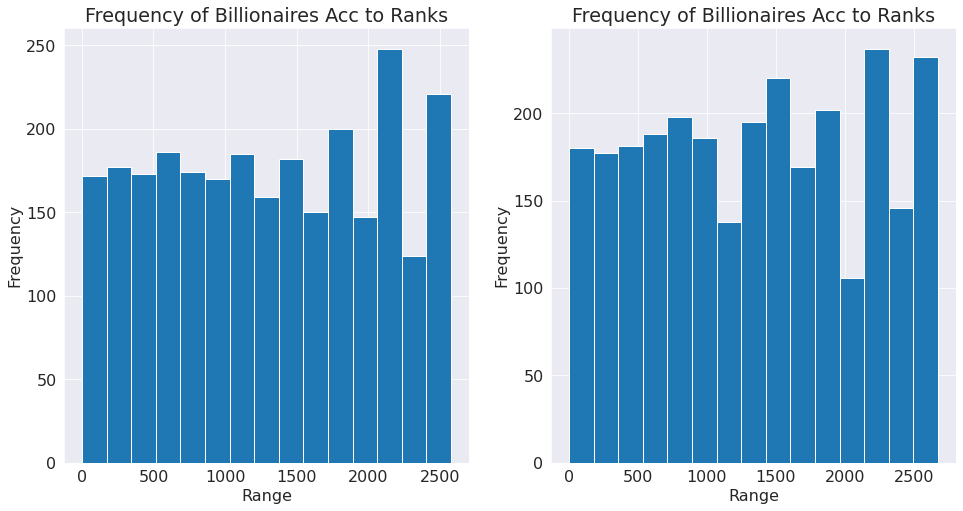

In [41]:
import matplotlib
matplotlib.rcParams['font.size'] = 16
fig, axes= plt.subplots(1,2,figsize=(16,8))
axes[0].hist(clean_data_2022.Rank,bins=15)
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Range')
axes[0].set_title('Frequency of Billionaires Acc to Ranks')
axes[1].hist(clean_data_2021.Rank,bins=15)
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Range')
axes[1].set_title('Frequency of Billionaires Acc to Ranks');

We can see that most of the Billionaires having the same rank as we move down and the same pattern followed in both the years.

## Where the most number of Billionaires reside?

### Data preparation for the graph:

In [42]:
top_countries_count_2022=clean_data_2022.Country.value_counts()
top_countries_count_2022.head(20)

United States     748
China             571
India             159
Germany           112
United Kingdom     85
Switzerland        73
Hong Kong          68
Russia             65
Brazil             54
Italy              49
Canada             45
South Korea        43
Taiwan             42
Australia          41
Japan              38
Singapore          35
France             34
Sweden             32
Indonesia          27
Thailand           27
Name: Country, dtype: int64

In [43]:
top_countries_count_2021=clean_data_2021.Country.value_counts()
top_countries_count_2021.head(20)

United States     724
China             626
India             140
Germany           136
Russia            118
Hong Kong          71
Brazil             65
Canada             64
United Kingdom     56
Italy              51
Japan              49
Taiwan             47
Australia          44
South Korea        43
France             42
Sweden             41
Switzerland        40
Thailand           31
Spain              30
Turkey             27
Name: Country, dtype: int64

From the above two data we can see that in both the years USA and China are the top contributor country.

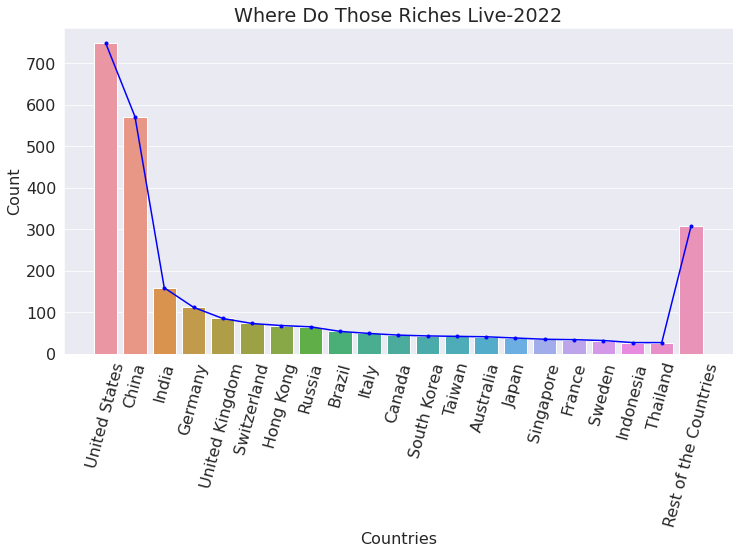

In [44]:
import matplotlib
matplotlib.rcParams['font.size'] = 16
top_20_countries_2022=top_countries_count_2022[:20]
oth=pd.Series([top_countries_count_2022[20:].sum()], index=['Rest of the Countries'])
country_count_oth_inc_2022=top_20_countries_2022.append(oth)
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Where Do Those Riches Live-2022')
sns.barplot(x=country_count_oth_inc_2022.index, y=country_count_oth_inc_2022);
plt.plot(country_count_oth_inc_2022.index,country_count_oth_inc_2022,'.-b')
plt.ylabel('Count');
plt.xlabel('Countries');

In the Year 2022 United States Contributes maximum number of Billionaires (748).

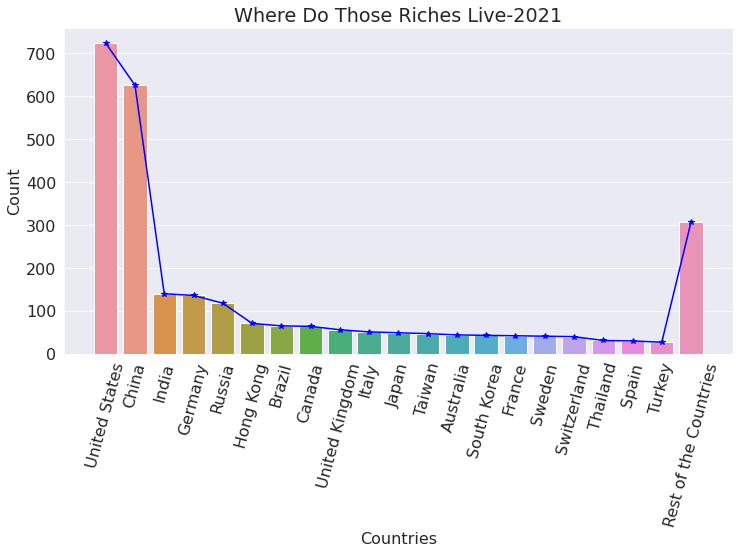

In [45]:
import matplotlib
matplotlib.rcParams['font.size'] = 16
top_20_countries_2021=top_countries_count_2021[:20]
oth=pd.Series([top_countries_count_2022[20:].sum()], index=['Rest of the Countries'])
country_count_oth_inc_2021=top_20_countries_2021.append(oth)
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Where Do Those Riches Live-2021')
sns.barplot(x=country_count_oth_inc_2021.index, y=country_count_oth_inc_2021);
plt.plot(country_count_oth_inc_2021.index,country_count_oth_inc_2021,'*-b')
plt.ylabel('Count');
plt.xlabel('Countries');

In [46]:
df_2021_counts = clean_data_2021.Country.value_counts().rename_axis('Country').reset_index(name='counts')
df_2021_counts['Year']=np.full(70,2021)
print(df_2021_counts)

                 Country  counts  Year
0          United States     724  2021
1                  China     626  2021
2                  India     140  2021
3                Germany     136  2021
4                 Russia     118  2021
..                   ...     ...   ...
65             Venezuela       1  2021
66  Eswatini (Swaziland)       1  2021
67               Algeria       1  2021
68         Liechtenstein       1  2021
69                 Nepal       1  2021

[70 rows x 3 columns]


In [47]:
df_2022_counts = clean_data_2022.Country.value_counts().rename_axis('Country').reset_index(name='counts')
df_2022_counts['Year']=np.full(73,2022)
print(df_2022_counts)

           Country  counts  Year
0    United States     748  2022
1            China     571  2022
2            India     159  2022
3          Germany     112  2022
4   United Kingdom      85  2022
..             ...     ...   ...
68        Portugal       1  2022
69         Georgia       1  2022
70         Algeria       1  2022
71        Colombia       1  2022
72         Andorra       1  2022

[73 rows x 3 columns]


In [48]:
df_2022_counts_top_15=df_2022_counts[:15]

In [49]:
options=df_2022_counts.Country[:15]

In [50]:
rslt_df_counts = df_2021_counts[df_2021_counts['Country'].isin(options)]

In [51]:
rslt_df_counts

,Country,counts,Year
0,United States,724,2021
1,China,626,2021
2,India,140,2021
3,Germany,136,2021
4,Russia,118,2021
5,Hong Kong,71,2021
6,Brazil,65,2021
7,Canada,64,2021
8,United Kingdom,56,2021
9,Italy,51,2021


In [52]:
df_counts_2021_2022=df_2022_counts_top_15.append(rslt_df_counts)

In [53]:
df_counts_2021_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 16
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  30 non-null     object
 1   counts   30 non-null     int64 
 2   Year     30 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 960.0+ bytes


In [54]:
df_counts_2021_2022.sample(5)

,Country,counts,Year
5,Hong Kong,71,2021
6,Hong Kong,68,2022
7,Russia,65,2022
1,China,626,2021
14,Japan,38,2022


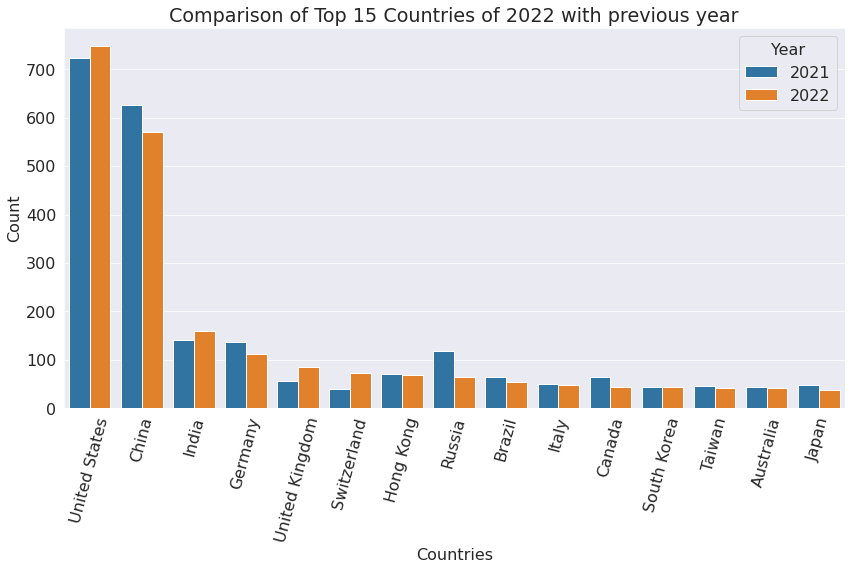

In [55]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.size'] = 16
plt.figure(figsize=(14,7))
sns.barplot(x='Country',y='counts',hue='Year',data=df_counts_2021_2022)
plt.xticks(rotation=75)
plt.title('Comparison of Top 15 Countries of 2022 with previous year')
plt.ylabel('Count');
plt.xlabel('Countries');

From the above graph we can see that there are two pilors which shows us that the China is giving neck to neck competition to the USA. We can also see that if we change our plans then we can also be the in the top two. 

In [56]:
df_2022_percentage=df_2022_counts[:15]

In [57]:
df_2022_percentage.rename(columns={'counts':'counts_22'},inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [58]:
pd_2021_2022_percentage=pd.merge(df_2022_percentage,rslt_df_counts , on='Country')

In [59]:

pd_2021_2022_percentage.head()

,Country,counts_22,Year_x,counts,Year_y
0,United States,748,2022,724,2021
1,China,571,2022,626,2021
2,India,159,2022,140,2021
3,Germany,112,2022,136,2021
4,United Kingdom,85,2022,56,2021


In [60]:
pd_2021_2022_percentage.drop(['Year_x','Year_y'],axis=1,inplace=True)

In [61]:
pd_2021_2022_percentage['percentage']=round((100*(pd_2021_2022_percentage.counts_22-pd_2021_2022_percentage.counts)/pd_2021_2022_percentage.counts),2)

In [62]:
pd_2021_2022_percentage.head()

,Country,counts_22,counts,percentage
0,United States,748,724,3.31
1,China,571,626,-8.79
2,India,159,140,13.57
3,Germany,112,136,-17.65
4,United Kingdom,85,56,51.79


## Percentage Growth Year to Year

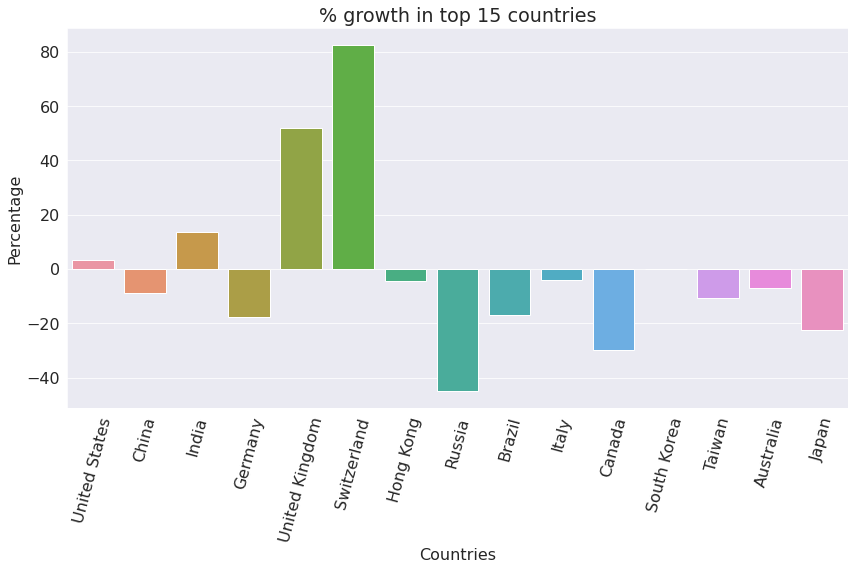

In [63]:
import matplotlib
matplotlib.rcParams['font.size'] = 16
plt.figure(figsize=(14,7))
sns.barplot(x='Country',y='percentage',data=pd_2021_2022_percentage)
plt.xticks(rotation=75)
plt.title('% growth in top 15 countries')
plt.ylabel('Percentage')
plt.xlabel('Countries');

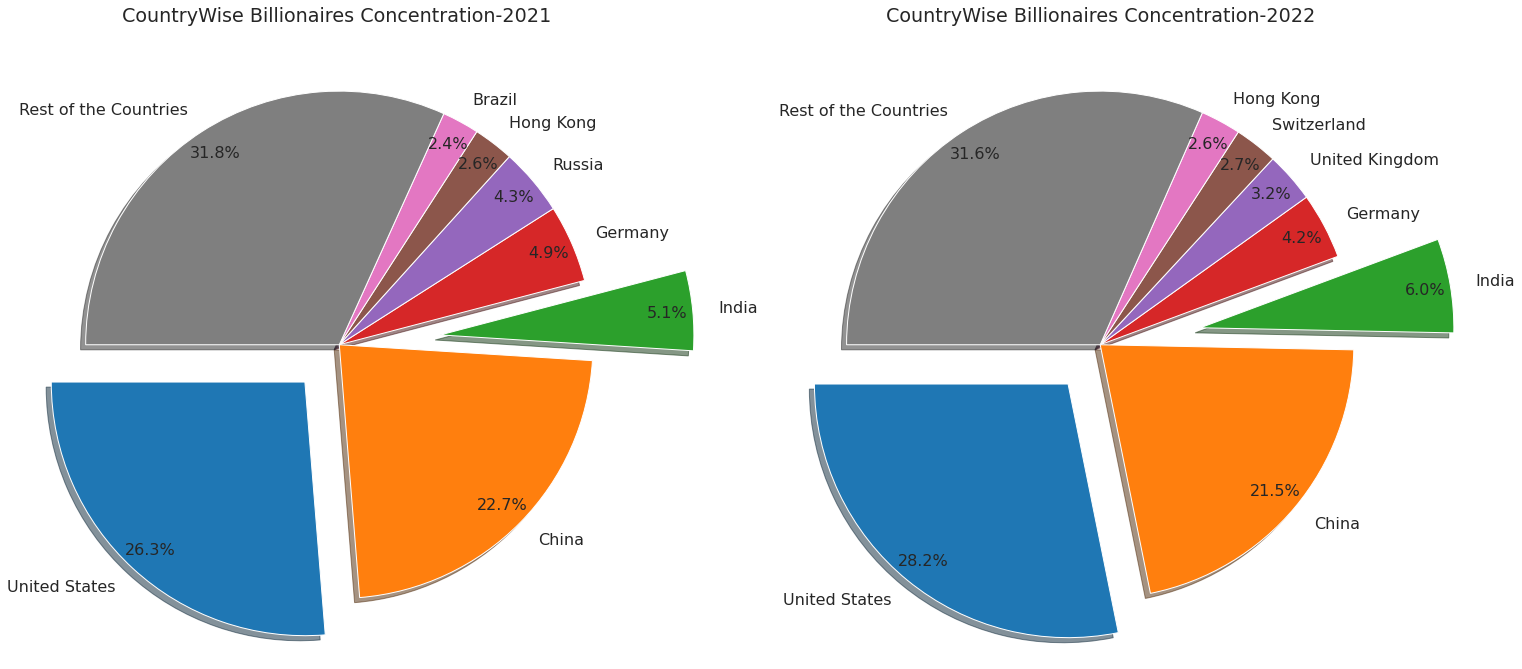

In [64]:
import matplotlib
matplotlib.rcParams['font.size'] = 16
fig,axes= plt.subplots(1,2,figsize=(25,12))
df_concentration_2021=top_countries_count_2021[:7]
oth=pd.Series([top_countries_count_2021[7:].sum()], index=['Rest of the Countries'])
df_concentration_2021_oth=df_concentration_2021.append(oth)

myexplode = [0.2, 0, 0.4, 0,0,0,0,0]

axes[0].pie(df_concentration_2021_oth, labels=df_concentration_2021_oth.index, autopct='%1.1f%%', startangle=180,pctdistance=.9,explode = myexplode, shadow = True);
axes[0].set_title('CountryWise Billionaires Concentration-2021 ')

df_concentration_2022=top_countries_count_2022[:7]
oth=pd.Series([top_countries_count_2022[7:].sum()], index=['Rest of the Countries'])
df_concentration_2022_oth=df_concentration_2022.append(oth)

axes[1].pie(df_concentration_2022_oth, labels=df_concentration_2022_oth.index, autopct='%1.1f%%', startangle=180,pctdistance=.9,explode = myexplode, shadow = True);
axes[1].set_title('CountryWise Billionaires Concentration-2022');


In [65]:
top_countries_wealth_contri_2021 = clean_data_2021.groupby('Country').NetWorth_Billion_Dollars.sum().sort_values(ascending=False).rename_axis('Country').reset_index(name='Total_Contri')
top_countries_wealth_contri_2022 = clean_data_2022.groupby('Country').NetWorth_Billion_Dollars.sum().sort_values(ascending=False).rename_axis('Country').reset_index(name='Total_Contri')[:15]


In [66]:
top_countries_wealth_contri_2022['Year']=np.full(15,2022)

In [67]:
top_countries_wealth_contri_2021['Year']=np.full(70,2021)

In [68]:
options_contri=top_countries_wealth_contri_2022.Country

In [69]:
rslt_df_contri=top_countries_wealth_contri_2021[top_countries_wealth_contri_2021['Country'].isin(options_contri)]

In [70]:
rslt_df_contri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 17
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       15 non-null     object 
 1   Total_Contri  15 non-null     float64
 2   Year          15 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 480.0+ bytes


In [71]:
df_2021_2022_contri=top_countries_wealth_contri_2022.append(rslt_df_contri)

In [72]:
df_2021_2022_contri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 17
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30 non-null     object 
 1   Total_Contri  30 non-null     float64
 2   Year          30 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 960.0+ bytes


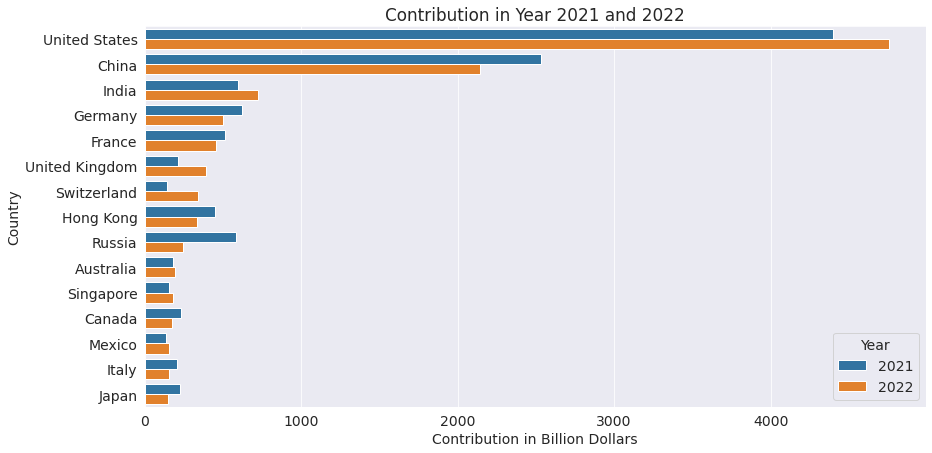

In [73]:
import matplotlib
matplotlib.rcParams['font.size'] = 14
plt.figure(figsize=(14,7))
sns.barplot(x='Total_Contri',y='Country',hue='Year',data=df_2021_2022_contri)
plt.title('Contribution in Year 2021 and 2022')
plt.xlabel('Contribution in Billion Dollars');


In [74]:
mean_networth_2021=clean_data_2021.groupby('Country').NetWorth_Billion_Dollars.mean().sort_values(ascending=False)
df_mean_2021=mean_networth_2021[:20]
oth=pd.Series([mean_networth_2021[20:].mean()], index=['Rest of the Countries'])
df_mean_2021_oth=df_mean_2021.append(oth)

mean_networth_2022=clean_data_2022.groupby('Country').NetWorth_Billion_Dollars.mean().sort_values(ascending=False)
df_mean_2022=mean_networth_2022[:20]
oth=pd.Series([mean_networth_2022[20:].mean()], index=['Rest of the Countries'])
df_mean_2022_oth=df_mean_2022.append(oth)



In [75]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

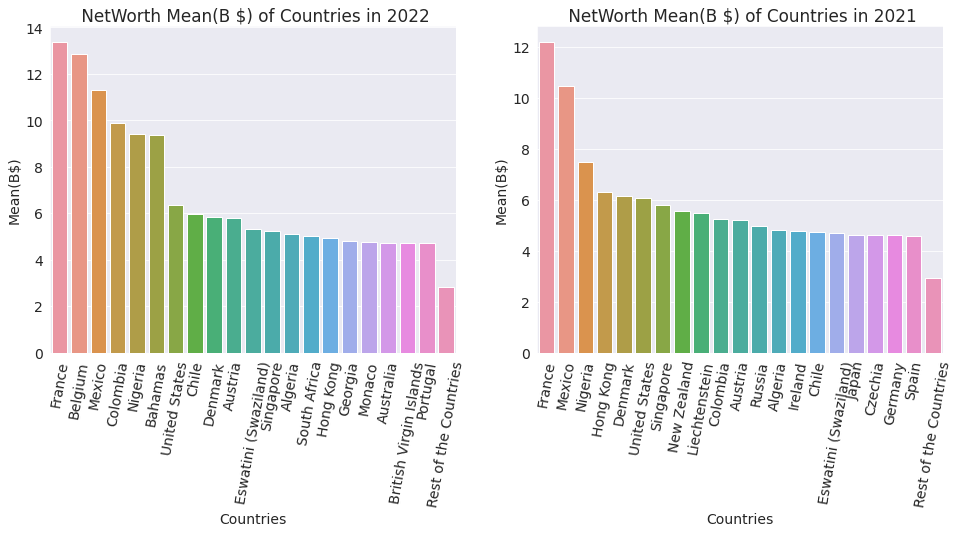

In [76]:
fig,axes=plt.subplots(1,2,figsize=(16,6))
axes[0].set_title(' NetWorth Mean(B $) of Countries in 2022');
axes[1].set_title(' NetWorth Mean(B $) of Countries in 2021');
axes[0].set_xlabel('Countries')
axes[1].set_xlabel('Countries')
axes[0].set_ylabel('Mean(B$)')
axes[1].set_ylabel('Mean(B$)')
sns.barplot(x=df_mean_2022_oth.index,y=df_mean_2022_oth,ax=axes[0])
axes[0].set_xticklabels(labels=df_mean_2022_oth.index, rotation=80)
sns.barplot(x=df_mean_2021_oth.index,y=df_mean_2021_oth,ax=axes[1])
axes[1].set_xticklabels(labels=df_mean_2021_oth.index, rotation=80)
plt.show()


In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

In [ ]:

cata_df_2022=clean_data_2022.groupby('Source')['NetWorth_Billion_Dollars'].agg(["sum", "min", "max",'count','mean'])
cata_df_2022=cata_df_2022.sort_values(by='sum',ascending=False)
cata_df_2022=cata_df_2022[cata_df_2022['count']>5]
cata_df_2022=cata_df_2022[:15]
cata_df_2022.head()

In [ ]:
cata_df_2022=clean_data_2022.Source.value_counts().rename_axis('Source').reset_index(name='counts')
cata_df_2022=cata_df_2022[:15]
cata_df_2022['Year']=np.full(15,2022)
options_cata=cata_df_2022.Source
cata_df_2021=clean_data_2021.Source.value_counts().rename_axis('Source').reset_index(name='counts')
cata_df_2021=cata_df_2021[cata_df_2021['Source'].isin(options_cata)]
cata_df_2021['Year']=np.full(15,2021)
cata_df_2021_2022=cata_df_2021.append(cata_df_2022)
cata_df_2021_2022.sample(5)

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Growth of Industry in 2021 and 2022')
plt.xticks(rotation=80)
sns.barplot(x='Source',y='counts',hue='Year',data=cata_df_2021_2022);

In [ ]:
india_df_2022=clean_data_2022[clean_data_2022.Country=='India']
india_df_2022=india_df_2022.sort_values(by='Rank')
india_df_2022.head(10)

In [ ]:
india_df_2022

In [ ]:
india_df_2021=clean_data_2021[clean_data_2021.Country=='India']
india_df_2021=india_df_2021.sort_values(by='Rank')
india_df_2022=india_df_2022[:15]
options_india=india_df_2022.Name
india_df_2021=india_df_2021[india_df_2021['Name'].isin(options_india)]
india_df_2021_2022=india_df_2021.append(india_df_2022)
india_df_2021_2022.sample(3)

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Indian Billionaires Growth')
sns.barplot(y='Name',x='NetWorth_Billion_Dollars',hue='Year',data=india_df_2021_2022);

In [ ]:
india_count_source_raw_22=clean_data_2022[clean_data_2022.Country=='India']
india_count_source=india_count_source_raw_22.Source.value_counts().rename_axis('Source').reset_index(name='Counts')
india_count_source=india_count_source[:10]
india_count_source['Year']=np.full(10,2022)
options_source=india_count_source.Source
india_count_source_raw_21=clean_data_2021[clean_data_2021.Country=='India']
india_count_source_21=india_count_source_raw_21.Source.value_counts().rename_axis('Source').reset_index(name='Counts')
india_count_source_21=india_count_source_21[india_count_source_21['Source'].isin(options_source)]
india_count_source_21['Year']=np.full(10,2021)
india_count_source=india_count_source.append(india_count_source_21)

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Growth in Particular Sector in India')
sns.barplot(x='Source',y='Counts',hue='Year',data=india_count_source);

### India position in world in Pharmaceuticals in year 2021 and 2022:


In [ ]:
pos_year_2021=clean_data_2021[clean_data_2021['Source']=='pharmaceuticals'].Country.value_counts()
pos_count_21=pos_year_2021[:6]
oth_count_21=pd.Series([pos_year_2021[6:].sum()],index=['Rest of the Countries'])
pos_count_oth_2021=pos_count_21.append(oth_count_21)

pos_year_2022=clean_data_2022[clean_data_2022['Source']=='pharmaceuticals'].Country.value_counts()
pos_count_22=pos_year_2022[:6]
oth_count_22=pd.Series([pos_year_2022[6:].sum()],index=['Rest of the Countries'])
pos_count_oth_2022=pos_count_22.append(oth_count_22)

fig,axes= plt.subplots(1,2,figsize=(25,12))
explode1=[0,0.2,0,0,0,0,0]
axes[0].pie(pos_count_oth_2021, labels=pos_count_oth_2021.index, autopct='%1.1f%%', startangle=180,pctdistance=.9,explode=explode1, shadow = True);
axes[1].pie(pos_count_oth_2022, labels=pos_count_oth_2022.index, autopct='%1.1f%%', startangle=180,pctdistance=.9,explode=explode1, shadow = True);
axes[0].set_title('India in Pharmaceuticals Sector -2021')
axes[1].set_title('India in Pharmaceuticals Sector -2022')



On going through the 

In [ ]:
jovian.commit()
